# Setting up

In [1]:
# Prepare dependencies
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('seaborn')

In [2]:
# Import data and take a quick look at it
sleepData = pd.read_csv("Data/sleep.csv")
sleepData.head()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.0,0.0,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.0,0.0,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.0,0.0,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096


# Checking the data

In [7]:
# Types of variables
sleepData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 34 columns):
age         706 non-null int64
black       706 non-null int64
case        706 non-null int64
clerical    706 non-null float64
construc    706 non-null float64
educ        706 non-null int64
earns74     706 non-null int64
gdhlth      706 non-null int64
inlf        706 non-null int64
leis1       706 non-null int64
leis2       706 non-null int64
leis3       706 non-null int64
smsa        706 non-null int64
lhrwage     532 non-null float64
lothinc     706 non-null float64
male        706 non-null int64
marr        706 non-null int64
prot        706 non-null int64
rlxall      706 non-null int64
selfe       706 non-null int64
sleep       706 non-null int64
slpnaps     706 non-null int64
south       706 non-null int64
spsepay     706 non-null int64
spwrk75     706 non-null int64
totwrk      706 non-null int64
union       706 non-null int64
worknrm     706 non-null int64
workscnd    706 non

In [6]:
# Summary statistics
sleepData.describe().T

,count,mean,std,min,25%,50%,75%,max
age,706.0,38.815864,11.342637,23.000000,29.000000,36.000000,48.000000,65.000000
black,706.0,0.049575,0.217219,0.000000,0.000000,0.000000,0.000000,1.000000
case,706.0,353.500000,203.948932,1.000000,177.250000,353.500000,529.750000,706.000000
clerical,706.0,0.182331,0.335413,0.000000,0.000000,0.000000,0.182331,1.000000
construc,706.0,0.030075,0.148366,0.000000,0.000000,0.000000,0.030075,1.000000
educ,706.0,12.780453,2.784702,1.000000,12.000000,12.000000,16.000000,17.000000
earns74,706.0,9767.705382,9323.588151,0.000000,2500.000000,8250.000000,13750.000000,42500.000000
gdhlth,706.0,0.890935,0.311942,0.000000,1.000000,1.000000,1.000000,1.000000
inlf,706.0,0.753541,0.431254,0.000000,1.000000,1.000000,1.000000,1.000000
leis1,706.0,4690.723796,908.049561,1745.000000,4109.750000,4620.000000,5203.750000,7417.000000


In [10]:
# NaNs? Yes - 174 in hrwage/lhrwage
sleepData.isnull().sum()

age           0
black         0
case          0
clerical      0
construc      0
educ          0
earns74       0
gdhlth        0
inlf          0
leis1         0
leis2         0
leis3         0
smsa          0
lhrwage     174
lothinc       0
male          0
marr          0
prot          0
rlxall        0
selfe         0
sleep         0
slpnaps       0
south         0
spsepay       0
spwrk75       0
totwrk        0
union         0
worknrm       0
workscnd      0
exper         0
yngkid        0
yrsmarr       0
hrwage      174
agesq         0
dtype: int64

In [4]:
df.isnull().sum()

age           0
black         0
case          0
clerical      0
construc      0
educ          0
earns74       0
gdhlth        0
inlf          0
leis1         0
leis2         0
leis3         0
smsa          0
lhrwage     174
lothinc       0
male          0
marr          0
prot          0
rlxall        0
selfe         0
sleep         0
slpnaps       0
south         0
spsepay       0
spwrk75       0
totwrk        0
union         0
worknrm       0
workscnd      0
exper         0
yngkid        0
yrsmarr       0
hrwage      174
agesq         0
dtype: int64

In [11]:
# Replacing NaNs with medians
hrwageMedian = sleepData['hrwage'].median()
sleepData['hrwage'] = sleepData['hrwage'].fillna(hrwageMedian)

lhrwageMedian = sleepData['lhrwage'].median()
sleepData['lhrwage'] = sleepData['lhrwage'].fillna(lhrwageMedian)

In [14]:
# Outliers? Boxplot
# fig, ax = plt.subplots(figsize=(10, 8))
# ax.set_xlabel("Values", fontsize=14)
# ax.tick_params(labelsize=14)
# ax = sns.boxplot(data=sleepData)

# fig.savefig("Boxplot_Commute", bbox_inches = 'tight')

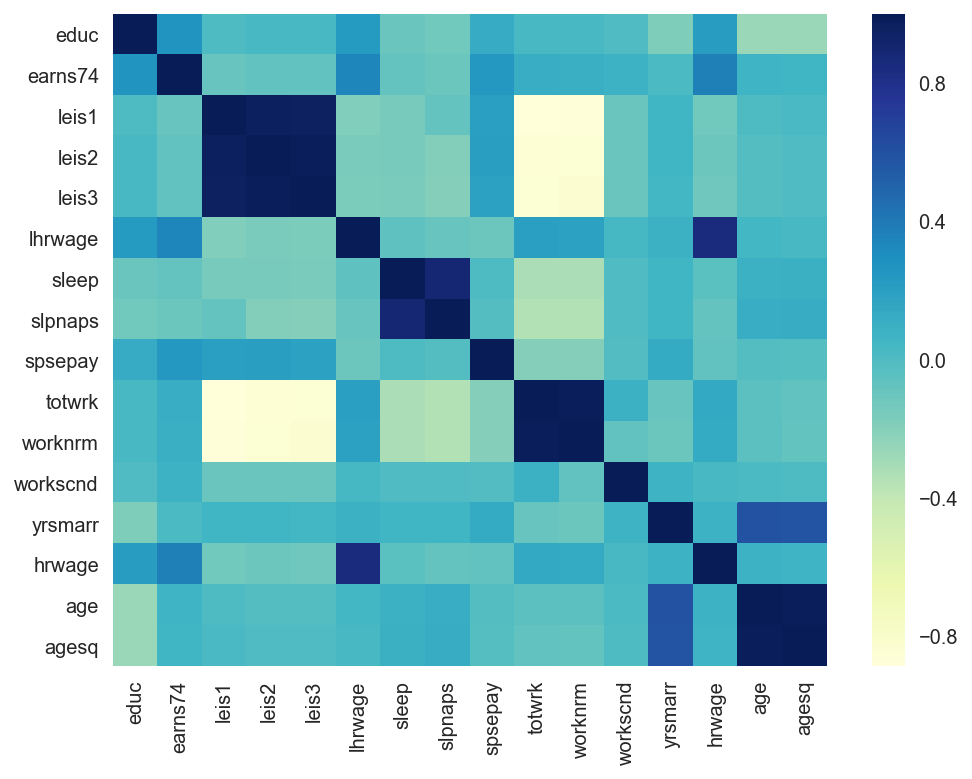

In [10]:
df1 = df[['educ', 'earns74', 'leis1', 'leis2', 'leis3', 'lhrwage', 'sleep', 
          'slpnaps', 'spsepay', 'totwrk', 'worknrm', 'workscnd', 'yrsmarr', 'hrwage', 
          'age', 'agesq']]

fig = plt.figure(figsize = (8,6))
sns.heatmap(df1.corr(), cmap="YlGnBu")
plt.show()

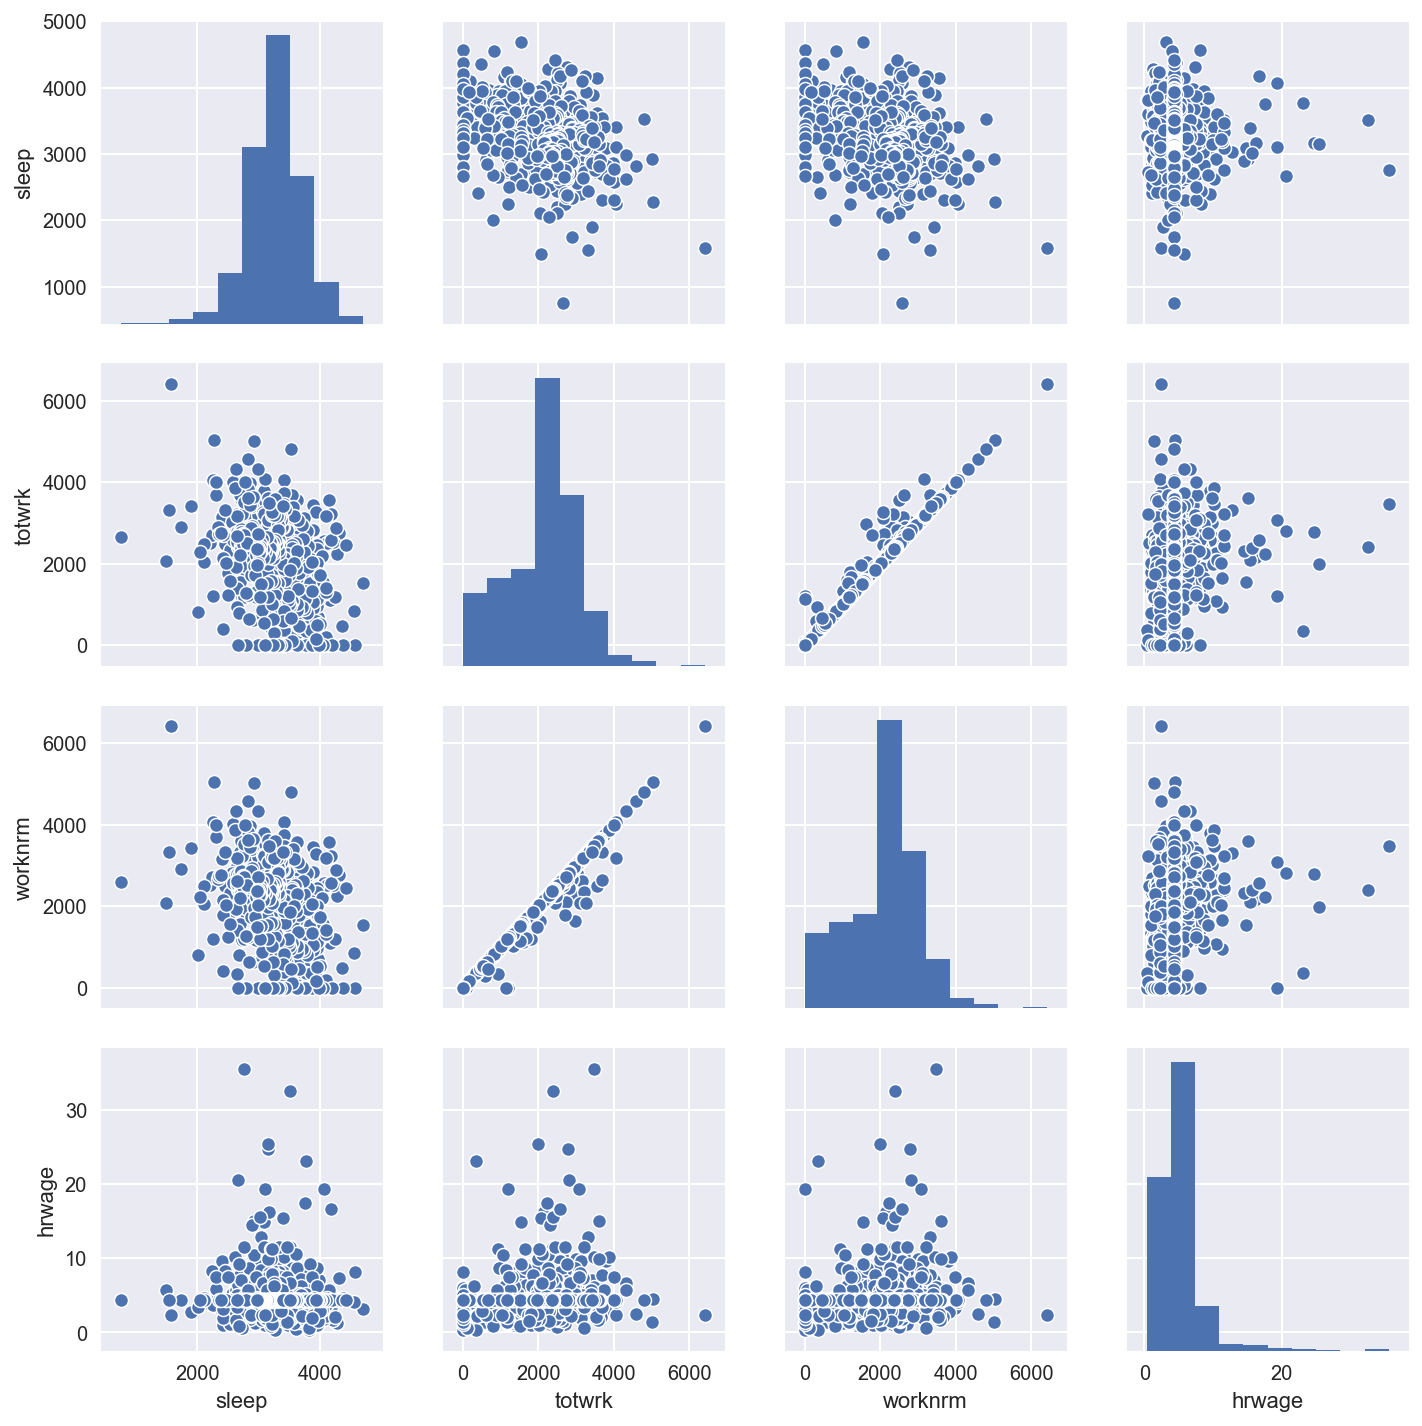

In [11]:
df2 = df[['sleep', 'totwrk','worknrm', 'hrwage']]
sns.pairplot(df2)

## Fitting a MLR Model

In [12]:
from patsy import dmatrices
import statsmodels.api as sm
import patsy
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [13]:
X = df[['totwrk','worknrm', 'workscnd', 'hrwage']]
y = df.sleep.values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(494, 4) (494,)
(212, 4) (212,)


In [15]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
lm_ytrain_predictions = lm.predict(X_train)

Text(0, 0.5, 'Predicted Values')

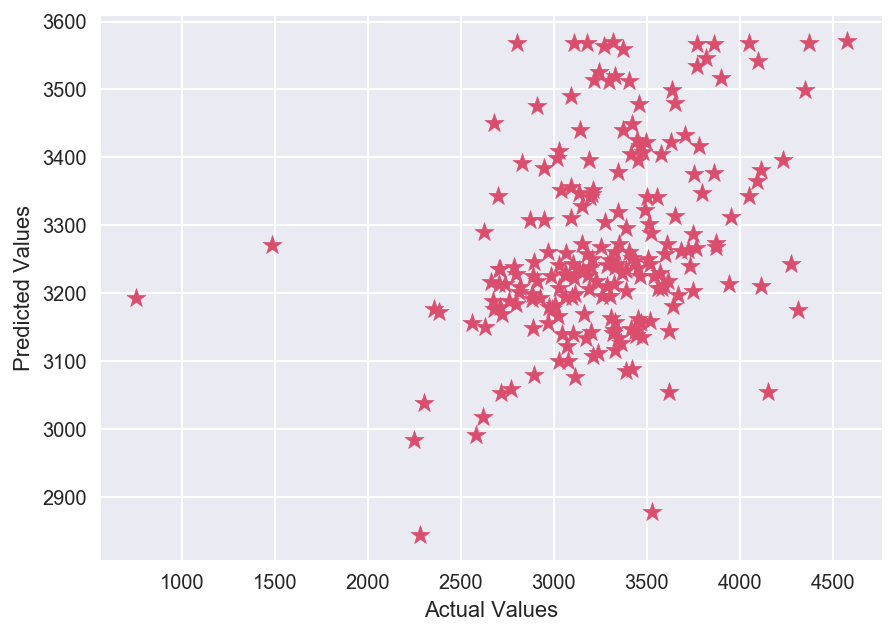

In [16]:
fig = plt.figure(figsize = (7,5))
plt.scatter(y_test, predictions, color='#DB4D6D', marker='*', s =100)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

In [17]:
def r2_mse(y_train, y_test, X_train, X_test, test, model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
            metrics.mean_squared_error(y_train, y_train_pred),
            metrics.mean_squared_error(y_test, y_test_pred)))
    
    print ('RSquared ' + test + ' train data: %.2f, test data: %.2f' % (
            metrics.r2_score(y_train, y_train_pred),
            metrics.r2_score(y_test, y_test_pred)))

In [18]:
r2_mse(y_train, y_test, X_train, X_test, 'OLS', lm)

MSE OLS train data: 169822.70, test data: 192854.14
RSquared OLS train data: 0.09, test data: 0.12


In [19]:
print ("Score:", model.score(X_test, y_test))
print ("Model coefficients are:", lm.coef_)
print ("Model intercept is:", lm.intercept_)

Score: 0.12281866414107834
Model coefficients are: [-0.06372178 -0.07994406  0.01622227  0.94189685]
Model intercept is: 3564.0886195022217


## Fitting a Ridge Regression Model

In [20]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [21]:
ridge_alpha = np.logspace(0,5,100)
ridge = RidgeCV(alphas=ridge_alpha, cv=6, normalize=True)
ridge.fit(X_train, y_train)
print (ridge.alpha_)

1.0


In [22]:
ridge_model = Ridge(alpha=1.0, normalize=True)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge.predict(X_test)
ridge_ytrain_predictions = ridge.predict(X_train)

Text(0, 0.5, 'Predicted Values - Ridge')

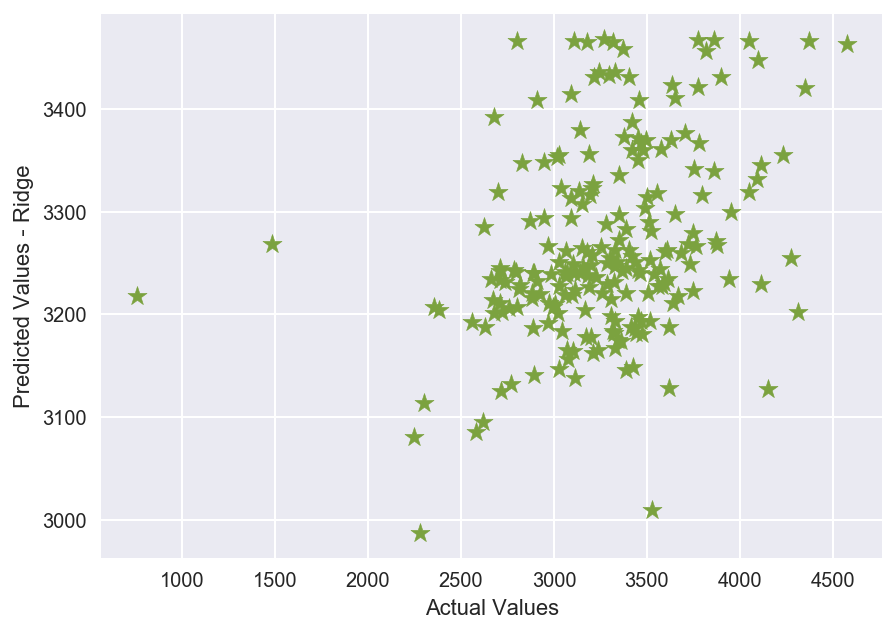

In [23]:
fig = plt.figure(figsize = (7,5))
plt.scatter(y_test, ridge_predictions, color="#7BA23F", marker="*", s=100)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values - Ridge")

In [24]:
print ('MSE(Ridge) train data: %.3f, test data: %.3f' % (
        metrics.mean_squared_error(y_test, ridge_predictions),
        metrics.mean_squared_error(y_train, ridge_ytrain_predictions)))

print ('RSquared(Ridge) train data: %.3f, test data: %.3f' % (
        metrics.r2_score(y_test, ridge_predictions),
        metrics.r2_score(y_train, ridge_ytrain_predictions)))

MSE(Ridge) train data: 197508.937, test data: 171822.601
RSquared(Ridge) train data: 0.102, test data: 0.084


In [25]:
print ("Score:", ridge.score(X_test, y_test))
print ("Ridge model coefficients are:", ridge.coef_)
print ("Ridge model intercept is:", ridge.intercept_)

Score: 0.10164671329017959
Ridge model coefficients are: [-0.04732277 -0.04768097  0.01304615 -0.60987985]
Ridge model intercept is: 3468.937590798089


## Fitting a Lasso Regression Model

In [26]:
lasso = LassoCV(n_alphas=100, cv=6, normalize=True, verbose=1)
lasso.fit(X_train, y_train)
print (lasso.alpha_)

0.6866695313560125


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s finished


In [27]:
lasso_model = Lasso(alpha=lasso.alpha_, normalize=True)
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso.predict(X_test)
lasso_ytrain_predictions = lasso.predict(X_train)

Text(0, 0.5, 'Predicted Values - Lasso')

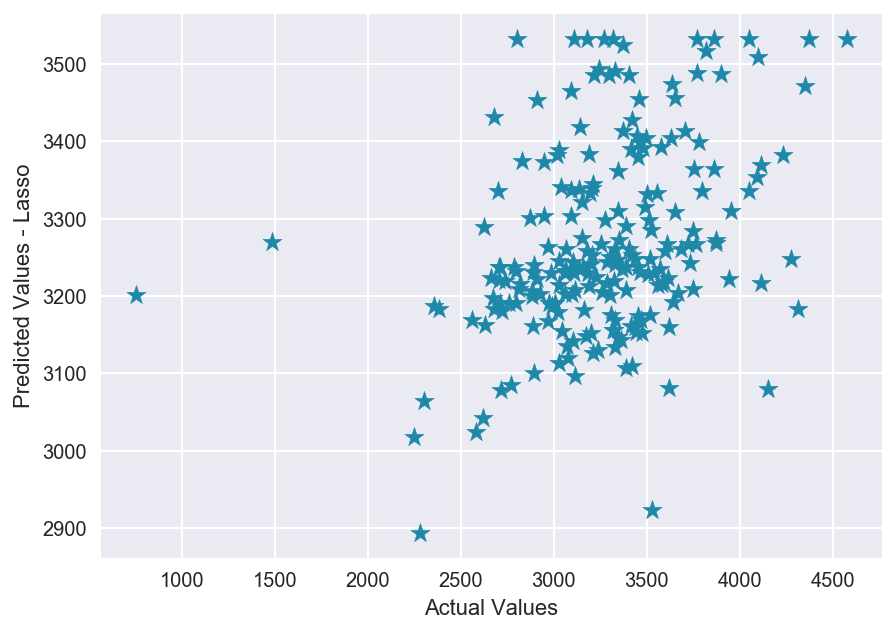

In [28]:
fig = plt.figure(figsize = (7,5))
plt.scatter(y_test, lasso_predictions, color="#1E88A8", marker="*", s=100)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values - Lasso")

In [29]:
print ('MSE(Lasso) train data: %.3f, test data: %.3f' % (
        metrics.mean_squared_error(y_test, lasso_predictions),
        metrics.mean_squared_error(y_train, lasso_ytrain_predictions)))

print ('RSquared(Lasso) train data: %.3f, test data: %.3f' % (
        metrics.r2_score(y_test, lasso_predictions),
        metrics.r2_score(y_train, lasso_ytrain_predictions)))

MSE(Lasso) train data: 193951.486, test data: 170065.895
RSquared(Lasso) train data: 0.118, test data: 0.093


In [30]:
print ("Score:", lasso.score(X_test, y_test))
print ("Lasso model coefficients are:", lasso.coef_)
print ("Lasso model intercept is:", lasso.intercept_)

Score: 0.11782748926670539
Lasso model coefficients are: [-0.03835133 -0.08832007  0.          0.        ]
Lasso model intercept is: 3532.647788087912


## Elastic Net Cross Validation - combining Ridge & Lasso

In [31]:
ratio = np.linspace(0.01, 1, 50)
encv = ElasticNetCV(l1_ratio=ratio, n_alphas=100, cv=6, normalize=True, verbose=1)
encv.fit(X_train, y_train)
print (encv.alpha_)
print (encv.l1_ratio_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.6866695313560125
1.0


............................................................................................[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    6.9s finished


In [32]:
encv_model = ElasticNet(alpha=encv.alpha_, l1_ratio=encv.l1_ratio_, normalize=True)
encv_model.fit(X_train, y_train)
encv_predictions = encv.predict(X_test)
encv_ytrain_predictions = encv.predict(X_train)

Text(0, 0.5, 'Predicted Values - Elastic Net CV')

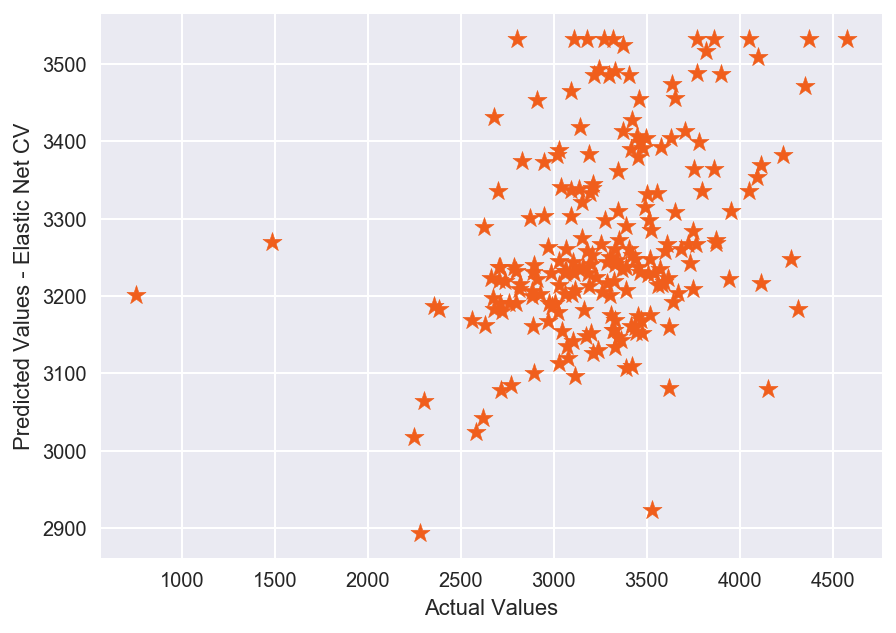

In [33]:
fig = plt.figure(figsize = (7,5))
plt.scatter(y_test, encv_predictions, color="#F05E1C", marker="*", s=100)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values - Elastic Net CV")

In [34]:
print ('MSE(Elastic Net CV) train data: %.3f, test data: %.3f' % (
        metrics.mean_squared_error(y_test, encv_predictions),
        metrics.mean_squared_error(y_train, encv_ytrain_predictions)))

print ('RSquared(Elastic Net CV) train data: %.3f, test data: %.3f' % (
        metrics.r2_score(y_test, encv_predictions),
        metrics.r2_score(y_train, encv_ytrain_predictions)))

MSE(Elastic Net CV) train data: 193951.486, test data: 170065.895
RSquared(Elastic Net CV) train data: 0.118, test data: 0.093


In [35]:
print ("Score:", encv.score(X_test, y_test))
print ("Elastic Net CV coefficients are:", encv.coef_)
print ("Elastic Net CV intercept is:", encv.intercept_)

Score: 0.11782748926670539
Elastic Net CV coefficients are: [-0.03835133 -0.08832007  0.          0.        ]
Elastic Net CV intercept is: 3532.647788087912


## Plotting the residuals

In [36]:
lm_res_test = y_test - predictions
ridge_res_test = y_test - ridge_predictions
lasso_res_test = y_test - lasso_predictions
encv_res_test = y_test - encv_predictions

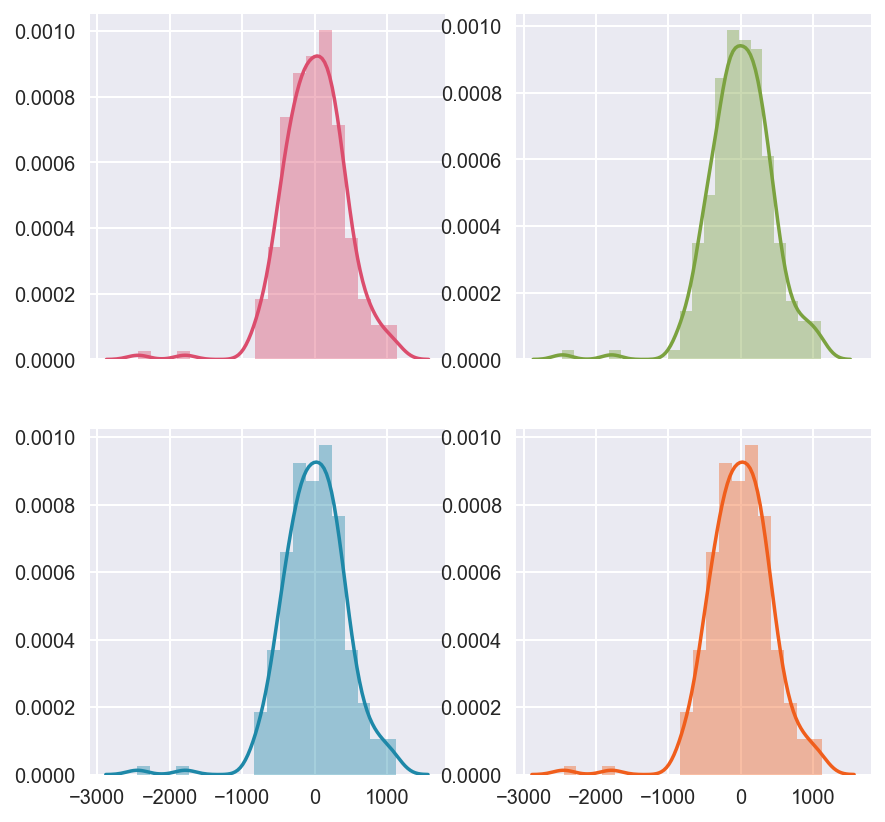

In [37]:
f, axes = plt.subplots(2, 2, figsize=(7,7), sharex=True)
sns.despine(left=True)

sns.distplot(lm_res_test, color="#DB4D6D", ax=axes[0,0])
sns.distplot(ridge_res_test, color="#7BA23F", ax=axes[0,1])
sns.distplot(lasso_res_test, color="#1E88A8", ax=axes[1,0])
sns.distplot(encv_res_test, color="#F05E1C", ax=axes[1,1])

plt.show()

## Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [44]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)
dtc_predictions = dtc.predict(X_test)
metrics.accuracy_score(y_test, dtc_predictions)

0.0